**Import all the necessary python packages**

In [1]:
from pyclics.api import Clics
import pandas as pd
import numpy as np
import sqlite3
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Collection**

**Connect to the database which has been downloaded**

In [36]:
# Specify the correct path to your database
db_path = "/Users/sunnywong/Library/Application Support/cldf/clics.sqlite"

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object
cursor = conn.cursor()

**Explore the database**

In [37]:
# Get the names of all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('dataset',), ('datasetmeta',), ('SourceTable',), ('LanguageTable',), ('ParameterTable',), ('FormTable',), ('ValueTable',), ('CognateTable',), ('BorrowingTable',), ('FormSource',), ('ValueSource',), ('CognateSource',), ('BorrowingSource',)]


**Load the data of all forms from the database**

In [38]:
# Read the FormTable from the sqlite file
all_forms_database = pd.read_sql_query("SELECT * FROM FormTable;", conn)

**Load the data of all languages from the database**

In [39]:
# Read the LanguageTable from the sqlite file
all_languages_database = pd.read_sql_query("SELECT * FROM LanguageTable;", conn)

**Load the data all parameters from the database**

In [6]:
# Read the ParameterTable from the sqlite file
all_parameters_database = pd.read_sql_query("SELECT * FROM ParameterTable;", conn)

**Disconnect to the database**

In [7]:
conn.close()

**Explore the form table**

In [143]:
all_forms_database.shape

(1462125, 43)

In [144]:
#Print all column names
all_forms_database.columns

Index(['ID', 'Language_ID', 'Parameter_ID', 'Value', 'Form',
       'Local_Orthography', 'Segments', 'Comment', 'dataset_ID', 'clics_form',
       'Local_ID', 'Cognacy', 'Loan', 'Word_ID', 'word_source', 'Borrowed',
       'Borrowed_score', 'comment_on_borrowed', 'comment_on_word_form',
       'borrowed_base', 'other_comments', 'loan_history', 'Analyzability',
       'Simplicity_score', 'reference', 'numeric_frequency', 'age_label',
       'gloss', 'integration', 'salience', 'effect', 'contact_situation',
       'original_script', 'Orthography', 'Transcription', 'AlternativeValue',
       'AlternativeTranscription', 'diacl_id', 'meaning', 'meaning_note',
       'transliteration', 'ipa', 'Benzi'],
      dtype='object')

In [145]:
all_forms_database[:5]

,ID,Language_ID,Parameter_ID,Value,Form,Local_Orthography,Segments,Comment,dataset_ID,clics_form,...,Orthography,Transcription,AlternativeValue,AlternativeTranscription,diacl_id,meaning,meaning_note,transliteration,ipa,Benzi
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,a d i,None,lexirumah,adi,...,None,None,None,None,None,None,None,None,None,None
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,w a r i,None,lexirumah,wari,...,None,None,None,None,None,None,None,None,None,None
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,i j e,None,lexirumah,ije,...,None,None,None,None,None,None,None,None,None,None
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,f ɪ r i,None,lexirumah,firi,...,None,None,None,None,None,None,None,None,None,None
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,t u ŋ t a m a,None,lexirumah,tungtama,...,None,None,None,None,None,None,None,None,None,None


**Explore the Language Table**

In [146]:
all_languages_database.shape

(3248, 49)

In [147]:
#Print all column names
all_languages_database.columns

Index(['ID', 'Name', 'Family', 'Latitude', 'Longitude', 'Region', 'Glottocode',
       'ISO639P3code', 'Culture', 'Description', 'Orthography', 'Comment',
       'Macroarea', 'dataset_ID', 'Glottolog_Name', 'Source', 'Location',
       'Source_ID', 'SubGroup', 'WOLD_ID', 'Dialect', 'ChineseName',
       'DialectGroup', 'Token', 'Subfamily', 'Short_Name', 'Type', 'Coverage',
       'Date', 'Transcriber', 'STEDT_Name', 'Area', 'Name_in_Source',
       'Village', 'Number', 'Phylum', 'Population', 'time_frame', 'DataSource',
       'Autonym', 'ISO', 'ID_in_Source', 'Number_in_Source', 'author', 'url',
       'typedby', 'checkedby', 'notes', 'WiktionaryName'],
      dtype='object')

In [148]:
all_languages_database[:5]

,ID,Name,Family,Latitude,Longitude,Region,Glottocode,ISO639P3code,Culture,Description,...,Autonym,ISO,ID_in_Source,Number_in_Source,author,url,typedby,checkedby,notes,WiktionaryName
0,abui1241-fuime,"Abui, Fuimelang",Timor-Alor-Pantar,-8.31058,124.588,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,...,None,None,None,None,None,None,None,None,None,None
1,abui1241-petle,"Abui, Petleng",Timor-Alor-Pantar,-8.31058,124.588,"Kecamatan Teluk Mutiara, Kabupaten Alor, East ...",abui1241,abz,None,None,...,None,None,None,None,None,None,None,None,None,None
2,abui1241-takal,"Abui, Takalelang",Timor-Alor-Pantar,-8.31058,124.588,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,abui,None,...,None,None,None,None,None,None,None,None,None,None
3,abui1241-ulaga,"Abui, Ulaga",Timor-Alor-Pantar,-8.31058,124.588,"Kecamatan Alor Barat Daya, Kabupaten Alor, Eas...",abui1241,abz,None,None,...,None,None,None,None,None,None,None,None,None,None
4,adan1251-lawah,"Adang, Lawahing",Timor-Alor-Pantar,-8.18958,124.448,"Kecamatan Alor Barat Laut, Kabupaten Alor, Eas...",adan1251,adn,None,None,...,None,None,None,None,None,None,None,None,None,None


**Explore the parameter table**

In [149]:
all_parameters_database.shape

(18954, 19)

In [150]:
#Print all column names
all_parameters_database.columns

Index(['ID', 'Description', 'Name', 'Indonesian', 'Semantic_Field',
       'Elicitation_Notes', 'Core_Set', 'Concepticon_ID', 'Comment',
       'dataset_ID', 'Ontological_Category', 'Concepticon_Gloss',
       'Chinese_Gloss', 'Number', 'NorthEuralex_Gloss', 'SrcId', 'Spanish',
       'Gloss_in_digital_source', 'DIACL_ID'],
      dtype='object')

In [151]:
all_parameters_database[:5]

,ID,Description,Name,Indonesian,Semantic_Field,Elicitation_Notes,Core_Set,Concepticon_ID,Comment,dataset_ID,Ontological_Category,Concepticon_Gloss,Chinese_Gloss,Number,NorthEuralex_Gloss,SrcId,Spanish,Gloss_in_digital_source,DIACL_ID
0,to_bless,None,bless,memberkati,Religion and belief,None,None,391,None,lexirumah,Action/Process,BLESS,None,None,None,None,None,None,None
1,leg,None,leg,kaki,The body,None,None,1297,None,lexirumah,Person/Thing,LEG,None,None,None,None,None,None,None
2,to_play,None,play,main,Emotions and values,None,None,1413,None,lexirumah,Action/Process,PLAY,None,None,None,None,None,None,None
3,knee,None,knee,lutut,The body,None,None,1371,None,lexirumah,Person/Thing,KNEE,None,None,None,None,None,None,None
4,fat,None,fat,lemak,The body,None,None,323,None,lexirumah,Person/Thing,FAT (ORGANIC SUBSTANCE),None,None,None,None,None,None,None


# **2. Data Preparation**

**Prepare a matching table of all languages with unique language ID**

In [49]:
# Change the language names into proper case
all_languages_database['Name'] = all_languages_database['Name'].str.title()
# Remove all duplicated rows
all_languages_database_subset = all_languages_database[['ID', 'Name', 'Family']].drop_duplicates()

In [50]:
# Count how many rows are still duplicated
total_duplicate_ids_count = all_languages_database_subset['ID'].duplicated().sum()
print(f"Total count of IDs marked as duplicates (excluding first occurrence): {total_duplicate_ids_count}")

Total count of IDs marked as duplicates (excluding first occurrence): 4


In [51]:
# Evaluate the marginal cases
all_languages_database_subset[all_languages_database_subset['ID'].duplicated(keep=False)][:2000]


,ID,Name,Family
393,maia-pila,Maia-Pila,Nuclear Trans New Guinea
394,maia-saki,Maia-Saki,None
419,parawen,Parawen,None
1102,maia-pila,Maia (Pila Dialect),Nuclear Trans New Guinea
1103,maia-saki,Maia (Saki Dialect),Nuclear Trans New Guinea
1275,olo,Olo,Nuclear Torricelli
1307,parawen,Parawen,Nuclear Trans New Guinea
1847,olo,Olonets Karelian,Uralic


In [47]:
all_languages_database_subset[all_languages_database_subset['ID'] == 'kesawai']

,ID,Name,Family
388,kesawai,kesawai,Nuclear Trans New Guinea
1030,kesawai,Kesawai,Nuclear Trans New Guinea


In [155]:
# Keep the last occurrence
all_languages_database_subset = all_languages_database[['ID', 'Name', 'Family']].drop_duplicates(subset="ID", keep='last')

In [157]:
# Count how many rows are still duplicated
total_duplicate_ids_count = all_languages_database_subset['ID'].duplicated().sum()
print(f"Total count of IDs marked as duplicates (excluding first occurrence): {total_duplicate_ids_count}")

Total count of IDs marked as duplicates (excluding first occurrence): 0


**Add the information of language name and language family to the Form table by getting data from the Language Table**

In [158]:
# Merge the 2 tables by language ids
all_forms_database_merged = pd.merge(all_forms_database, all_languages_database_subset, left_on='Language_ID', right_on='ID', how='left')
# Drop the extra column from the language table that is used for matching language id
all_forms_database_merged = all_forms_database_merged.drop(columns=['ID_y']).rename(columns={'ID_x': 'ID'})

In [159]:
all_forms_database_merged.shape

(1462125, 45)

In [160]:
all_forms_database_merged[:5]

,ID,Language_ID,Parameter_ID,Value,Form,Local_Orthography,Segments,Comment,dataset_ID,clics_form,...,AlternativeValue,AlternativeTranscription,diacl_id,meaning,meaning_note,transliteration,ipa,Benzi,Name,Family
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,a d i,None,lexirumah,adi,...,None,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,w a r i,None,lexirumah,wari,...,None,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,i j e,None,lexirumah,ije,...,None,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,f ɪ r i,None,lexirumah,firi,...,None,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,t u ŋ t a m a,None,lexirumah,tungtama,...,None,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar


**Prepare a matching table of all parameters with unique language ID**

In [161]:
# Keep the last occurrence
all_parameters_database_subset = all_parameters_database[['ID', 'Semantic_Field']].drop_duplicates()

In [162]:
# Count how many rows are still duplicated
total_duplicate_ids_count = all_parameters_database_subset['ID'].duplicated().sum()
print(f"Total count of IDs marked as duplicates (excluding first occurrence): {total_duplicate_ids_count}")

Total count of IDs marked as duplicates (excluding first occurrence): 365


In [163]:
# Evaluate the marginal cases
all_parameters_database_subset[all_parameters_database_subset['ID'].duplicated(keep=False)]

,ID,Semantic_Field
320,deaf,The body
579,lime,The physical world
3728,deaf,Kinship
3926,lime,Agriculture and vegetation
5775,176_horn,Speech and language
...,...,...
18146,73,The body
18147,177,Agriculture and vegetation
18148,16,The body
18149,41,The body


In [164]:
all_parameters_database_subset.shape

(18542, 2)

**Add the information of language name and language family to the Form table by getting data from the Language Table**

In [165]:
all_forms_database_merged.columns

Index(['ID', 'Language_ID', 'Parameter_ID', 'Value', 'Form',
       'Local_Orthography', 'Segments', 'Comment', 'dataset_ID', 'clics_form',
       'Local_ID', 'Cognacy', 'Loan', 'Word_ID', 'word_source', 'Borrowed',
       'Borrowed_score', 'comment_on_borrowed', 'comment_on_word_form',
       'borrowed_base', 'other_comments', 'loan_history', 'Analyzability',
       'Simplicity_score', 'reference', 'numeric_frequency', 'age_label',
       'gloss', 'integration', 'salience', 'effect', 'contact_situation',
       'original_script', 'Orthography', 'Transcription', 'AlternativeValue',
       'AlternativeTranscription', 'diacl_id', 'meaning', 'meaning_note',
       'transliteration', 'ipa', 'Benzi', 'Name', 'Family'],
      dtype='object')

In [166]:
# Merge the 2 tables by Parameter ids
all_forms_database_merged = pd.merge(all_forms_database_merged, all_parameters_database_subset, left_on='Parameter_ID', right_on='ID', how='left')
# Drop the extra column from the language table that is used for matching language id
all_forms_database_merged = all_forms_database_merged.drop(columns=['ID_y']).rename(columns={'ID_x': 'ID'})

In [167]:
all_forms_database_merged.shape

(1475555, 46)

In [168]:
all_forms_database_merged[:5]

,ID,Language_ID,Parameter_ID,Value,Form,Local_Orthography,Segments,Comment,dataset_ID,clics_form,...,AlternativeTranscription,diacl_id,meaning,meaning_note,transliteration,ipa,Benzi,Name,Family,Semantic_Field
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,a d i,None,lexirumah,adi,...,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar,The physical world
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,w a r i,None,lexirumah,wari,...,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar,The physical world
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,i j e,None,lexirumah,ije,...,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar,The physical world
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,f ɪ r i,None,lexirumah,firi,...,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar,The physical world
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,t u ŋ t a m a,None,lexirumah,tungtama,...,None,None,None,None,None,None,None,"Abui, Fuimelang",Timor-Alor-Pantar,Time


**Create a list that contains all concept ids of body part**

In [169]:
body_mask = all_parameters_database["Ontological_Category"].isin(["Person/Thing"]) & all_parameters_database["Semantic_Field"].isin(['The body'])

# Get the IDs where person_thing_mask is True
body_part_ids = all_parameters_database.loc[body_mask, "ID"]

# Convert to a list if needed
body_part_list = body_part_ids.tolist()

In [170]:
body_part_list[:5]

['leg', 'knee', 'fat', 'fingernail', 'arm']

**Create a list that contains all concept ids of objects in other semantic type**

In [171]:
other_object_mask = all_parameters_database["Ontological_Category"].isin(["Person/Thing"]) & all_parameters_database["Semantic_Field"].isin(['The physical world', 'Animals', 'Warfare and hunting', 'Agriculture and vegetation', 'Food and drink', 'Basic actions and technology', 'The house', 'Clothing and grooming', 'Modern world'])

# Get the IDs where person_thing_mask is True
other_object_ids = all_parameters_database.loc[other_object_mask, "ID"]

# Convert to a list if needed
other_object_list = other_object_ids.tolist()

In [172]:
other_object_list[:5]

['forest', 'monitor_lizard', 'fish_trap', 'sky', 'rice_field']

**For each the lanuage in the world, extract all (concept id, language, form) and locate them in either the "Body Part" list or the "Other Object" List**

{(language id, language_family): {"body": [(form, concept_id, semantic_field)], "Other Object": [(form, concept_id, semantic_field)]}}

In [173]:
world_all_language_data = {}

for index, row in tqdm(all_forms_database_merged.iterrows(), total=len(all_forms_database_merged)):
    language = (row['Language_ID'], row['Family'])
    if language not in world_all_language_data.keys():
        world_all_language_data[language] = {"body_part":[], "other_object":[]}
    else:
        if row['Parameter_ID'] in body_part_list:
            world_all_language_data[language]['body_part'].append((row['clics_form'], row['Parameter_ID'], row['Semantic_Field']))
        if row['Parameter_ID'] in other_object_list:
            world_all_language_data[language]['other_object'].append((row['clics_form'], row['Parameter_ID'], row['Semantic_Field']))

100%|██████████████████████████████| 1475555/1475555 [01:36<00:00, 15215.81it/s]


In [174]:
print({k: world_all_language_data[k] for k in list(world_all_language_data)[:1]}) 

{('abui1241-fuime', 'Timor-Alor-Pantar'): {'body_part': [('hetamada', 'fat', 'The body'), ('hetaipa', 'bone', 'The body'), ('heakafata', 'rib', 'The body'), ('tamuring', 'sweat', 'The body'), ('we', 'blood', 'The body'), ('teai', 'vein', 'The body'), ('tebikemang', 'heart', 'The body'), ('tekaleu', 'liver', 'The body'), ('tatokfalala', 'guts', 'The body'), ('asi', 'excrement', 'The body'), ('tatokfoko', 'stomach_belly', 'The body'), ('kai', 'head', 'The body'), ('kaibata', 'hair', 'The body'), ('teamur', 'body_hair', 'The body'), ('tiengbilka', 'eye', 'The body'), ('taweiata', 'ear', 'The body'), ('tamini', 'nose', 'The body'), ('tawabak', 'mouth', 'The body'), ('tawakul', 'lips', 'The body'), ('taweiti', 'teeth', 'The body'), ('talifi', 'tongue', 'The body'), ('tawata', 'neck', 'The body'), ('tabang', 'shoulder', 'The body'), ('tatang', 'arm', 'The body'), ('tatangpaka', 'finger', 'The body'), ('tatangkusing', 'fingernail', 'The body'), ('tekodang', 'breast', 'The body'), ('tabike', '

**For each language in the world, extract all the pairs of colexification**

{(language_id, language_family): [((concept id, language, form, semantic_type), (concept id, language, form, semantic_type))... ]}

In [175]:
world_colexification = {} 

for language in world_all_language_data:
    if language not in world_colexification.keys():
        world_colexification[language] = []
    for body in world_all_language_data[language]["body_part"]:
        for other_object in world_all_language_data[language]["other_object"]:
            if body[0] == other_object[0]:
                world_colexification[language].append((body, other_object))

In [176]:
print({k: world_colexification[k] for k in list(world_colexification)[:5]}) 

{('abui1241-fuime', 'Timor-Alor-Pantar'): [(('kai', 'head', 'The body'), ('kai', 'dog', 'Animals'))], ('abui1241-petle', 'Timor-Alor-Pantar'): [], ('abui1241-takal', 'Timor-Alor-Pantar'): [], ('abui1241-ulaga', 'Timor-Alor-Pantar'): [(('asi', 'excrement', 'The body'), ('asi', 'salt', 'Food and drink'))], ('adan1251-lawah', 'Timor-Alor-Pantar'): [(('om', 'liver', 'The body'), ('om', 'lake', 'The physical world')), (('to', 'breast', 'The body'), ('to', 'milk', 'Food and drink'))]}


**For each pair of colexification, count its number of languages that they can be found in**

{((concept_id, semantic_type), (concept_id, semantic_type)): {(language_id, language_family)...}}

In [177]:
count_of_pair_world = {}

for language, pairs in world_colexification.items():
    for pair in pairs:
        if ((pair[0][1], pair[0][2]), (pair[1][1], pair[1][2])) not in count_of_pair_world.keys():
            count_of_pair_world[((pair[0][1], pair[0][2]), (pair[1][1], pair[1][2]))] = {language}
        else: 
            count_of_pair_world[((pair[0][1], pair[0][2]), (pair[1][1], pair[1][2]))].add(language)

In [178]:
count_of_pair_world_sort = dict(sorted(count_of_pair_world.items(), key=lambda item: item[1], reverse=True))
print({k: count_of_pair_world_sort[k] for k in list(count_of_pair_world_sort)[:5]}) 

{(('head', 'The body'), ('dog', 'Animals')): {('abui1241-fuime', 'Timor-Alor-Pantar')}, (('excrement', 'The body'), ('salt', 'Food and drink')): {('abui1241-ulaga', 'Timor-Alor-Pantar'), ('abui1241-papun', 'Timor-Alor-Pantar'), ('kama1365', 'Timor-Alor-Pantar')}, (('breast', 'The body'), ('milk', 'Food and drink')): {('pawaia', 'Pawaia'), ('inan1242', 'Inanwatan'), ('kasu1243', "South Bird's Head Family"), ('kaer1234', 'Timor-Alor-Pantar'), ('kelo1247-hopte', 'Timor-Alor-Pantar'), ('kafo1240', 'Timor-Alor-Pantar'), ('kelo1247-bring', 'Timor-Alor-Pantar'), ('ngao1245-watum', 'Austronesian'), ('sarr1247', 'Timor-Alor-Pantar'), ('dein1238', 'Timor-Alor-Pantar'), ('hama1240', 'Timor-Alor-Pantar'), ('blag1240-bama', 'Timor-Alor-Pantar'), ('mang1405', 'Austronesian'), ('lioo1240', 'Austronesian'), ('dela1252', 'Austronesian'), ('biak1248', 'Austronesian'), ('soaa1237', 'Austronesian'), ('lama1277-kalik', 'Austronesian'), ('adan1251-lawah', 'Timor-Alor-Pantar'), ('rett1240', 'Timor-Alor-Panta

**for each concept in the world, extract the unique language id that contains that concept in the data**

{concept_id: {(language_id, language_family) ...}}

In [179]:
languages_each_concept = all_forms_database_merged.groupby('Parameter_ID').apply(
    lambda x: set(tuple(row) for row in x[['Language_ID', 'Family']].itertuples(index=False)), include_groups=False
)
languages_each_concept = languages_each_concept.to_dict()

In [180]:
print({k: languages_each_concept[k] for k in list(languages_each_concept)[:5]}) 

{'-law': {('oksapmin-lower', 'Nuclear Trans New Guinea'), ('telefol', 'Nuclear Trans New Guinea'), ('proto-ok-oksapmin', 'Nuclear Trans New Guinea')}, '1': {('9', 'Atlantic-Congo'), ('7', 'Atlantic-Congo'), ('3', 'Atlantic-Congo'), ('4', 'Atlantic-Congo'), ('2', 'Atlantic-Congo'), ('1', 'Atlantic-Congo'), ('6', 'Atlantic-Congo'), ('5', 'Atlantic-Congo'), ('10', 'Atlantic-Congo')}, '1-100': {('502', 'Nakh-Daghestanian'), ('51', 'Nakh-Daghestanian'), ('290', 'Tupian'), ('214', 'Indo-European'), ('324', 'Nakh-Daghestanian'), ('251', 'Pumé'), ('39', 'Nakh-Daghestanian'), ('532', 'Nakh-Daghestanian'), ('709', 'Dravidian'), ('808', 'Austroasiatic'), ('183', 'Indo-European'), ('301', 'Guaicuruan'), ('287', 'Tupian'), ('403', 'Tai-Kadai'), ('517', 'Nakh-Daghestanian'), ('192', 'Indo-European'), ('830', 'Austroasiatic'), ('182', 'Indo-European'), ('221', 'Afro-Asiatic'), ('81', 'Nakh-Daghestanian'), ('59', 'Nakh-Daghestanian'), ('228', 'Athabaskan-Eyak-Tlingit'), ('57', 'Nakh-Daghestanian'), ('

**Calculate the probability**

For each pair of colexification, count their number of languages that both concepts can be founded in the dataset

Use this number as denominator and calculate the Global Probability,

P = Number of languages having that pair / Number of languages in the world that have that 2 concepts


In [181]:
probability_world = {}

for pair in count_of_pair_world.keys():
    concept_id_1 = pair[0][0]
    concept_id_2 = pair[1][0]
    languages_have_both_concepts = len(languages_each_concept[concept_id_1].intersection(languages_each_concept[concept_id_2]))
    probability_world[pair] = len(count_of_pair_world[pair]) / languages_have_both_concepts

In [182]:
print({k: probability_world[k] for k in list(probability_world)[:5]}) 

{(('head', 'The body'), ('dog', 'Animals')): 0.0008665511265164644, (('excrement', 'The body'), ('salt', 'Food and drink')): 0.014150943396226415, (('liver', 'The body'), ('lake', 'The physical world')): 0.003861003861003861, (('breast', 'The body'), ('milk', 'Food and drink')): 0.34615384615384615, (('lungs', 'The body'), ('foam', 'The physical world')): 0.06741573033707865}


To check: some probabilities may be too high, maybe it is due to not enoguh data for that particular concept pairs

**From the dictionary of count of all pairs, filter out the dictionaries for "Indo-european" and "Uralic" languages (the real count)**

{((concept_id, semantic_type), (concept_id, semantic_type)): total_count_of_all_languages_in_that_family}

In [183]:
count_of_pair_Indo_European = {
    pair: {
        language_tuple
        for language_tuple in language_set
        if language_tuple[1] == 'Indo-European'
    }
    for pair, language_set in count_of_pair_world.items()
}

# Remove keys where the resulting set of language tuples is empty
count_of_pair_Indo_European_clean = {
    pair_key: len(filtered_set)
    for pair_key, filtered_set in count_of_pair_Indo_European.items()
    if filtered_set # if the set is not empty
}

In [184]:
print({k: count_of_pair_Indo_European_clean[k] for k in list(count_of_pair_Indo_European_clean)[:5]}) 

{(('243_theskinorhide', 'The body'), ('481_theleather', 'Clothing and grooming')): 5, (('244_theflesh', 'The body'), ('441_themeat', 'Food and drink')): 7, (('299_thefingernail', 'The body'), ('300_theclaw', 'Animals')): 2, (('454_thegreaseorfat', 'The body'), ('453_theoil', 'Food and drink')): 1, (('328_thetesticles', 'The body'), ('469_theegg', 'Food and drink')): 2}


In [185]:
count_of_pair_Uralic = {
    pair: {
        language_tuple
        for language_tuple in language_set
        if language_tuple[1] == 'Uralic'
    }
    for pair, language_set in count_of_pair_world.items()
}

# Remove keys where the resulting set of language tuples is empty
count_of_pair_Uralic_clean = {
    pair_key: len(filtered_set)
    for pair_key, filtered_set in count_of_pair_Uralic.items()
    if filtered_set # if the set is not empty
}

In [186]:
print({k: count_of_pair_Uralic_clean[k] for k in list(count_of_pair_Uralic_clean)[:5]}) 

{(('244_theflesh', 'The body'), ('441_themeat', 'Food and drink')): 1, (('299_thefingernail', 'The body'), ('300_theclaw', 'Animals')): 1, (('251_theveinorartery', 'The body'), ('489_thethread', 'Clothing and grooming')): 1, (('267_theeye', 'The body'), ('517_thebead', 'Clothing and grooming')): 1, (('307_theheel', 'The body'), ('13_theshore', 'The physical world')): 1}


**Filter out the Concepts per languages in that family**

In [187]:
languages_each_concept_Indo_European = {
    concept: {
        language_tuple
        for language_tuple in language_set
        if language_tuple[1] == 'Indo-European'
    }
    for concept, language_set in languages_each_concept.items()
}

# Remove keys where the resulting set of language tuples is empty
languages_each_concept_Indo_European_clean = {
    pair_key: filtered_set
    for pair_key, filtered_set in languages_each_concept_Indo_European.items()
    if filtered_set # if the set is not empty
}

In [188]:
print({k: languages_each_concept_Indo_European_clean[k] for k in list(languages_each_concept_Indo_European_clean)[:5]}) 

{'1-100': {('209', 'Indo-European'), ('214', 'Indo-European'), ('705', 'Indo-European'), ('177', 'Indo-European'), ('169', 'Indo-European'), ('183', 'Indo-European'), ('210', 'Indo-European'), ('706', 'Indo-European'), ('179', 'Indo-European'), ('185', 'Indo-European'), ('203', 'Indo-European'), ('192', 'Indo-European'), ('191', 'Indo-European'), ('181', 'Indo-European'), ('182', 'Indo-European'), ('213', 'Indo-European'), ('198', 'Indo-European'), ('189', 'Indo-European'), ('199', 'Indo-European'), ('171', 'Indo-European'), ('190', 'Indo-European'), ('704', 'Indo-European'), ('176', 'Indo-European'), ('204', 'Indo-European'), ('180', 'Indo-European'), ('187', 'Indo-European'), ('212', 'Indo-European'), ('211', 'Indo-European'), ('74', 'Indo-European'), ('702', 'Indo-European'), ('195', 'Indo-European'), ('201', 'Indo-European'), ('194', 'Indo-European'), ('200', 'Indo-European'), ('196', 'Indo-European'), ('184', 'Indo-European'), ('170', 'Indo-European'), ('205', 'Indo-European'), ('

In [189]:
languages_each_concept_Uralic = {
    concept: {
        language_tuple
        for language_tuple in language_set
        if language_tuple[1] == 'Uralic'
    }
    for concept, language_set in languages_each_concept.items()
}

# Remove keys where the resulting set of language tuples is empty
languages_each_concept_Uralic_clean = {
    pair_key: filtered_set
    for pair_key, filtered_set in languages_each_concept_Uralic.items()
    if filtered_set # if the set is not empty
}

In [190]:
print({k: languages_each_concept_Uralic_clean[k] for k in list(languages_each_concept_Uralic_clean)[:5]}) 

{'1-100': {('127', 'Uralic'), ('146', 'Uralic'), ('126', 'Uralic'), ('128', 'Uralic'), ('159', 'Uralic'), ('131', 'Uralic'), ('139', 'Uralic'), ('147', 'Uralic'), ('151', 'Uralic'), ('148', 'Uralic'), ('135', 'Uralic'), ('143', 'Uralic')}, '1-210': {('127', 'Uralic'), ('146', 'Uralic'), ('126', 'Uralic'), ('128', 'Uralic'), ('159', 'Uralic'), ('131', 'Uralic'), ('139', 'Uralic'), ('147', 'Uralic'), ('151', 'Uralic'), ('148', 'Uralic'), ('135', 'Uralic'), ('143', 'Uralic')}, '1-212': {('127', 'Uralic'), ('146', 'Uralic'), ('126', 'Uralic'), ('128', 'Uralic'), ('159', 'Uralic'), ('131', 'Uralic'), ('139', 'Uralic'), ('147', 'Uralic'), ('151', 'Uralic'), ('148', 'Uralic'), ('135', 'Uralic'), ('143', 'Uralic')}, '1-213': {('127', 'Uralic'), ('146', 'Uralic'), ('126', 'Uralic'), ('128', 'Uralic'), ('159', 'Uralic'), ('131', 'Uralic'), ('139', 'Uralic'), ('147', 'Uralic'), ('151', 'Uralic'), ('148', 'Uralic'), ('135', 'Uralic'), ('143', 'Uralic')}, '1-214': {('127', 'Uralic'), ('146', 'Urali

**Conduct sampling to create a simulated dataset**

For every pair in Indo-european and Uralic language families respectively, conduct Bernoulli trial sampling 

number of trials = number of languages that have that 2 concepts

Conduct the simulation for thousands times to get a probability distribution

In [191]:
simulated_data_Indo_European = {}

for pair in count_of_pair_Indo_European_clean.keys():
    simulated_data_Indo_European[pair] = []
    
    concept_id_1 = pair[0][0]
    concept_id_2 = pair[1][0]
    number_trials = len(languages_each_concept_Indo_European_clean[concept_id_1].intersection(languages_each_concept_Indo_European_clean[concept_id_2]))
    probability = probability_world[pair]

    for i in range(5000):
        simulated_data_Indo_European[pair].append(np.random.binomial(1, probability, number_trials))

In [192]:
print(len(languages_each_concept_Indo_European_clean['19_head'].intersection(languages_each_concept_Indo_European_clean['418_boss'])))

simulated_data_Indo_European[(('19_head', 'The body'), ('418_boss', 'Modern world'))][:5]

37


[array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])]

In [193]:
simulated_data_Uralic = {}

for pair in count_of_pair_Uralic_clean.keys():
    simulated_data_Uralic[pair] = []
    
    concept_id_1 = pair[0][0]
    concept_id_2 = pair[1][0]
    number_trials = len(languages_each_concept_Uralic_clean[concept_id_1].intersection(languages_each_concept_Uralic_clean[concept_id_2]))
    probability = probability_world[pair]

    for i in range(5000):
        simulated_data_Uralic[pair].append(np.random.binomial(1, probability, number_trials))

In [194]:
print(len(languages_each_concept_Uralic_clean['19_head'].intersection(languages_each_concept_Uralic_clean['418_boss'])))

simulated_data_Uralic[(('19_head', 'The body'), ('418_boss', 'Modern world'))][:5]

26


[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0])]

# **3. Data Analysis: Simulation-based Hypothesis Test**

Hypothesis: 

There is no difference in term of the distributions of colexification between Indo-european languages and all languages in the world, and between Uralic languages and all languages in the world

Methods:
1. Pairwise: Simulate the number of occurence of each colexification pair found in that language family according to probability of that pair occuring in all languages in the world, then evaluate its p-value of the observed number of occurences in the distribtuon of the repeated Simulation
2. by semantic types: Compare the sum of observed number of occurences with the summed value of each simulation by semantic types

**3.1 Indo-european VS the world dataset**

**Hypothesis Testing (Pairwise)**

Observe the how extreme the count of that pair lies in the distribution

In [195]:
p_values_Indo_European = {}

for pair, simulated_counts_list in simulated_data_Indo_European.items():
    
    simulated_counts = np.array(simulated_counts_list)
    observed_count = count_of_pair_Indo_European_clean[pair]

    mean_simulated = np.mean(simulated_counts)

    # Calculate the absolute deviation of the observed count from the mean
    observed_deviation = abs(observed_count - mean_simulated)

    # Calculate the absolute deviations of all simulated counts from the mean
    simulated_deviations = abs(simulated_counts - mean_simulated)

    # The p-value is the proportion of simulated deviations that are
    # as large as or larger than the observed deviation.
    p_value = np.sum(simulated_deviations >= observed_deviation) / len(simulated_deviations)

    p_values_Indo_European[pair] = p_value

In [196]:
p_values_Indo_European

{(('243_theskinorhide', 'The body'),
  ('481_theleather', 'Clothing and grooming')): np.float64(0.0),
 (('244_theflesh', 'The body'),
  ('441_themeat', 'Food and drink')): np.float64(0.0),
 (('299_thefingernail', 'The body'),
  ('300_theclaw', 'Animals')): np.float64(0.0),
 (('454_thegreaseorfat', 'The body'),
  ('453_theoil', 'Food and drink')): np.float64(2.279),
 (('328_thetesticles', 'The body'),
  ('469_theegg', 'Food and drink')): np.float64(0.0),
 (('299_thefingernail', 'The body'),
  ('682_thenail', 'Basic actions and technology')): np.float64(0.0),
 (('329_thepenis', 'The body'),
  ('1238_thegun', 'Warfare and hunting')): np.float64(0.1834),
 (('374_theboil', 'The body'),
  ('682_thenail', 'Basic actions and technology')): np.float64(0.2052),
 (('253_therib', 'The body'),
  ('13_theshore', 'The physical world')): np.float64(0.1862),
 (('255_thetail', 'The body'),
  ('525_theplaitbraid', 'Clothing and grooming')): np.float64(0.1832),
 (('274_theearwax', 'The body'),
  ('226_the

**Hypothesis Testing (grouped by semantic types)**
 
Firstly, create a grouped dictionary: 

 {'Semantic_Type_1': [sum_of_simulated_counts_run1, sum_of_simulated_counts_run2, ...], ...n=5000}

In [197]:
semantic_types = ['The physical world', 'Animals', 'Warfare and hunting', 'Agriculture and vegetation', 'Food and drink', 'Basic actions and technology', 'The house', 'Clothing and grooming', 'Modern world']

In [198]:
total_per_test_run = {}
simulated_counts_grouped_Indo_European = {}

for sem_type in semantic_types:
    simulated_counts_grouped_Indo_European[sem_type] = []

# Create a grouped-by dataset for the simulated data
for num in range(5000):
    for sem_type in semantic_types:
        total_per_test_run[sem_type] = 0
    
    for pair in simulated_data_Indo_European.keys():
       total_per_test_run[pair[1][1]] += simulated_data_Indo_European[pair][num].sum()
        
    for item in semantic_types:
        simulated_counts_grouped_Indo_European[item].append(total_per_test_run[item])

In [199]:
simulated_counts_grouped_Indo_European['Food and drink'][:5]

[np.int64(117), np.int64(119), np.int64(144), np.int64(131), np.int64(136)]

In [200]:
# Create a grouped-by dataset for the observed data
count_of_pair_grouped_Indo_European = {}

for pair in count_of_pair_Indo_European_clean:
    if pair[1][1] not in count_of_pair_grouped_Indo_European:
        count_of_pair_grouped_Indo_European[pair[1][1]] = 0
    count_of_pair_grouped_Indo_European[pair[1][1]] += count_of_pair_Indo_European_clean[pair]

In [201]:
count_of_pair_grouped_Indo_European

{'Clothing and grooming': 157,
 'Food and drink': 144,
 'Animals': 108,
 'Basic actions and technology': 48,
 'Warfare and hunting': 15,
 'The physical world': 81,
 'Agriculture and vegetation': 104,
 'Modern world': 5,
 'The house': 13}

In [202]:
# Calculate Two-Tailed P-values for Grouped Data

p_values_grouped_Indo_European = {}

for sem_type, simulated_counts_list in simulated_counts_grouped_Indo_European.items():

    simulated_counts = simulated_counts_list
    observed_count = count_of_pair_grouped_Indo_European[sem_type]

    mean_simulated = np.mean(simulated_counts)

    observed_deviation = abs(observed_count - mean_simulated)
    simulated_deviations = abs(simulated_counts - mean_simulated)

    p_value = np.sum(simulated_deviations >= observed_deviation) / len(simulated_deviations)
    p_values_grouped_Indo_European[sem_type] = p_value


In [203]:
p_values_grouped_Indo_European

{'The physical world': np.float64(0.0),
 'Animals': np.float64(0.9512),
 'Warfare and hunting': np.float64(0.0),
 'Agriculture and vegetation': np.float64(0.0),
 'Food and drink': np.float64(0.1382),
 'Basic actions and technology': np.float64(0.0),
 'The house': np.float64(0.0),
 'Clothing and grooming': np.float64(0.5808),
 'Modern world': np.float64(0.5982)}

**Viusalize the results**

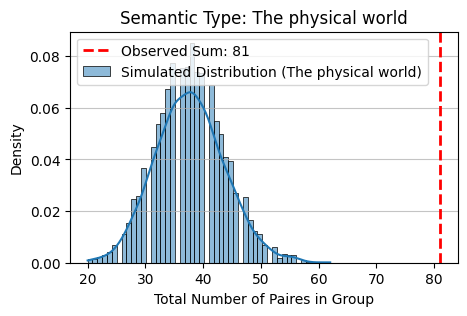

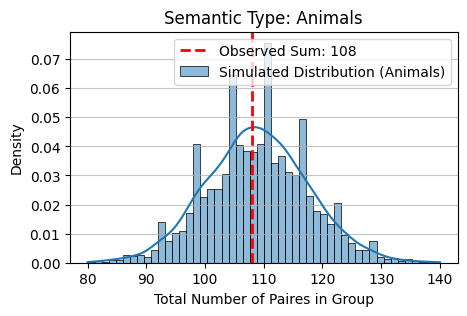

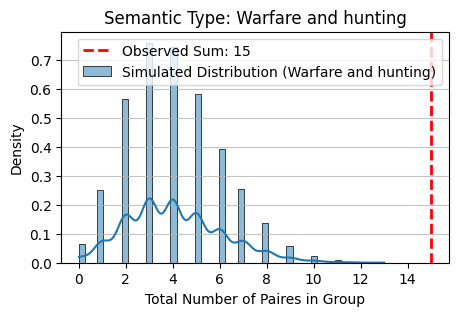

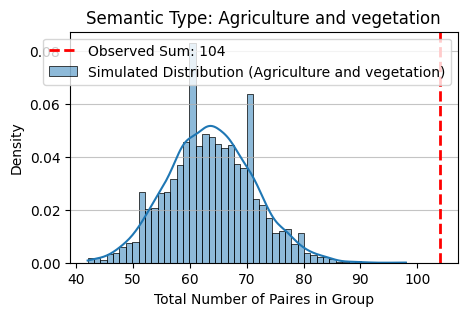

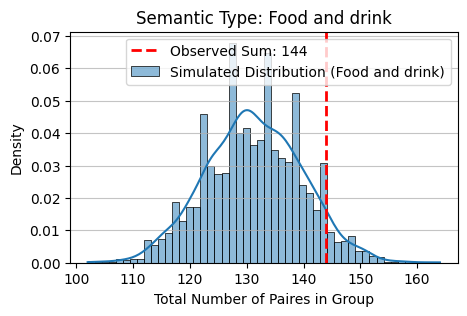

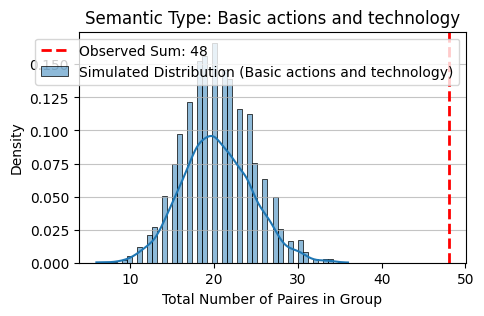

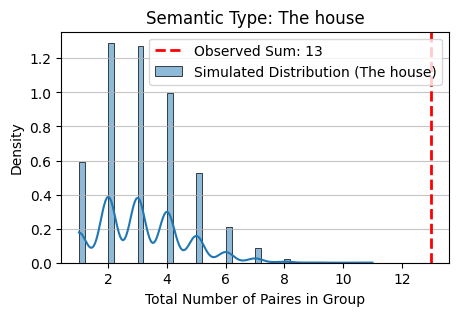

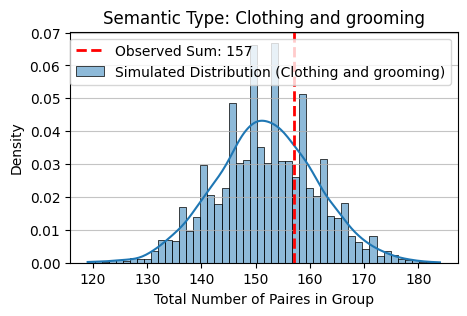

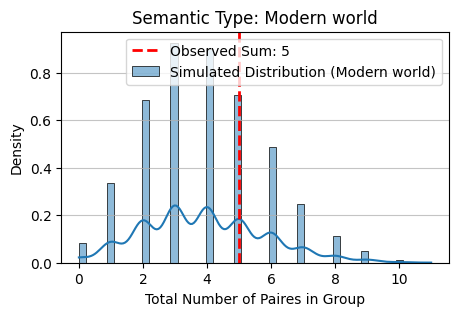

In [204]:

def plot_grouped_distribution(grouped_simulated_counts, grouped_observed_counts, num_bins=50):
    for sem_type in grouped_simulated_counts:
        simulated = np.array(grouped_simulated_counts[sem_type])
        observed = grouped_observed_counts[sem_type]

        plt.figure(figsize=(5, 3))
        sns.histplot(simulated, bins=num_bins, kde=True, stat="density", label=f"Simulated Distribution ({sem_type})")
        plt.axvline(observed, color='red', linestyle='dashed', linewidth=2, label=f'Observed Sum: {observed}')
        plt.title(f"Semantic Type: {sem_type}")
        plt.xlabel("Total Number of Paires in Group")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(axis='y', alpha=0.75)
        plt.show()

plot_grouped_distribution(simulated_counts_grouped_Indo_European, count_of_pair_grouped_Indo_European)

**3.2 Uralic VS the world dataset**

**Hypothesis Testing (Pairwise)**

Observe the how extreme the count of that pair lies in the distribution

In [205]:
p_values_Uralic = {}

for pair, simulated_counts_list in simulated_data_Uralic.items():
    
    simulated_counts = np.array(simulated_counts_list)
    observed_count = count_of_pair_Uralic_clean[pair]

    mean_simulated = np.mean(simulated_counts)

    # Calculate the absolute deviation of the observed count from the mean
    observed_deviation = abs(observed_count - mean_simulated)

    # Calculate the absolute deviations of all simulated counts from the mean
    simulated_deviations = abs(simulated_counts - mean_simulated)

    # The p-value is the proportion of simulated deviations that are
    # as large as or larger than the observed deviation.
    p_value = np.sum(simulated_deviations >= observed_deviation) / len(simulated_deviations)

    p_values_Uralic[pair] = p_value

In [206]:
p_values_Uralic

{(('244_theflesh', 'The body'),
  ('441_themeat', 'Food and drink')): np.float64(1.0),
 (('299_thefingernail', 'The body'),
  ('300_theclaw', 'Animals')): np.float64(0.484),
 (('251_theveinorartery', 'The body'),
  ('489_thethread', 'Clothing and grooming')): np.float64(0.0222),
 (('267_theeye', 'The body'),
  ('517_thebead', 'Clothing and grooming')): np.float64(0.0516),
 (('307_theheel', 'The body'),
  ('13_theshore', 'The physical world')): np.float64(0.026),
 (('328_thetesticles', 'The body'),
  ('198_thefish', 'Animals')): np.float64(0.0226),
 (('369_thewoundorsore', 'The body'),
  ('553_theblanket', 'The house')): np.float64(0.0224),
 (('372_theitch', 'The body'),
  ('62_thesmoke', 'The physical world')): np.float64(0.0258),
 (('1406_thevulva', 'The body'),
  ('63_theash', 'The physical world')): np.float64(0.0358),
 (('19_head', 'The body'),
  ('97_summit', 'The physical world')): np.float64(0.0),
 (('31_fingernail', 'The body'), ('126_claw', 'Animals')): np.float64(0.0),
 (('31

**Hypothesis Testing (grouped by semantic types)**

Firstly, create a grouped dictionary:

{'Semantic_Type_1': [sum_of_simulated_counts_run1, sum_of_simulated_counts_run2, ...], ...n=5000}

In [207]:
total_per_test_run = {}
simulated_counts_grouped_Uralic = {}

for sem_type in semantic_types:
    simulated_counts_grouped_Uralic[sem_type] = []

# Create a grouped-by dataset for the simulated data
for num in range(5000):
    for sem_type in semantic_types:
        total_per_test_run[sem_type] = 0
    
    for pair in simulated_data_Uralic.keys():
       total_per_test_run[pair[1][1]] += simulated_data_Uralic[pair][num].sum()
        
    for item in semantic_types:
        simulated_counts_grouped_Uralic[item].append(total_per_test_run[item])

In [215]:
simulated_counts_grouped_Uralic['The house'][:5]

[np.int64(3), np.int64(2), np.int64(2), np.int64(3), np.int64(4)]

In [209]:
# Create a grouped-by dataset for the observed data
count_of_pair_grouped_Uralic = {}

for pair in count_of_pair_Uralic_clean:
    if pair[1][1] not in count_of_pair_grouped_Uralic:
        count_of_pair_grouped_Uralic[pair[1][1]] = 0
    count_of_pair_grouped_Uralic[pair[1][1]] += count_of_pair_Uralic_clean[pair]

In [210]:
count_of_pair_grouped_Uralic

{'Food and drink': 42,
 'Animals': 93,
 'Clothing and grooming': 68,
 'The physical world': 37,
 'The house': 17,
 'Basic actions and technology': 13,
 'Modern world': 9,
 'Agriculture and vegetation': 18,
 'Warfare and hunting': 4}

In [211]:
# Calculate Two-Tailed P-values for Grouped Data

p_values_grouped_Uralic = {}

for sem_type, simulated_counts_list in simulated_counts_grouped_Uralic.items():

    simulated_counts = simulated_counts_list
    observed_count = count_of_pair_grouped_Uralic[sem_type]

    mean_simulated = np.mean(simulated_counts)

    observed_deviation = abs(observed_count - mean_simulated)
    simulated_deviations = abs(simulated_counts - mean_simulated)

    p_value = np.sum(simulated_deviations >= observed_deviation) / len(simulated_deviations)
    p_values_grouped_Uralic[sem_type] = p_value


In [212]:
p_values_grouped_Uralic

{'The physical world': np.float64(0.0),
 'Animals': np.float64(0.0),
 'Warfare and hunting': np.float64(0.0008),
 'Agriculture and vegetation': np.float64(0.0),
 'Food and drink': np.float64(0.0016),
 'Basic actions and technology': np.float64(0.0142),
 'The house': np.float64(0.0),
 'Clothing and grooming': np.float64(0.0),
 'Modern world': np.float64(0.0112)}

**Viusalize the results**

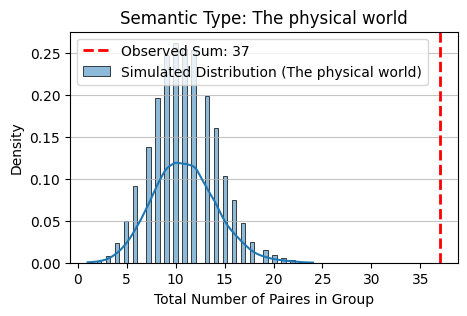

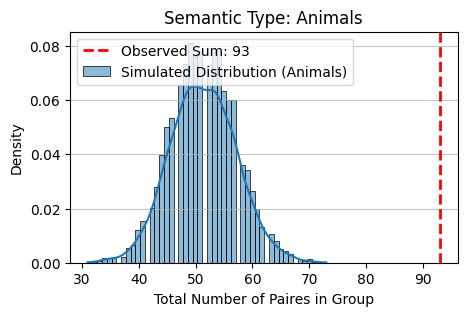

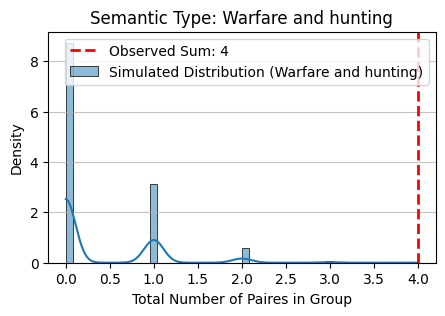

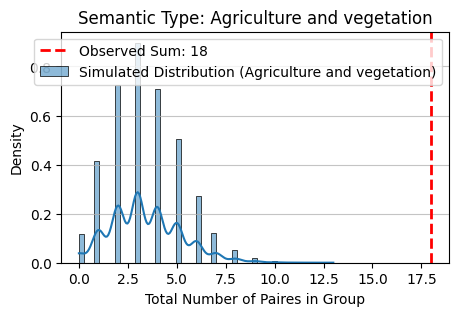

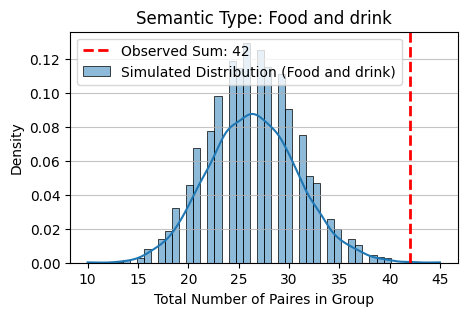

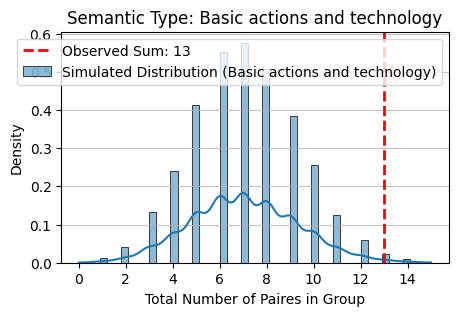

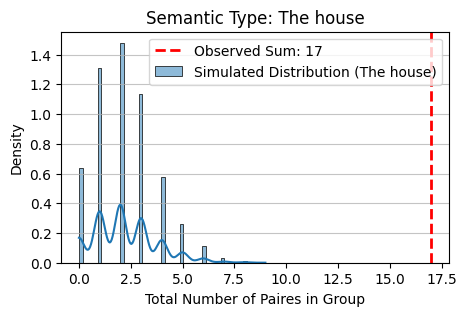

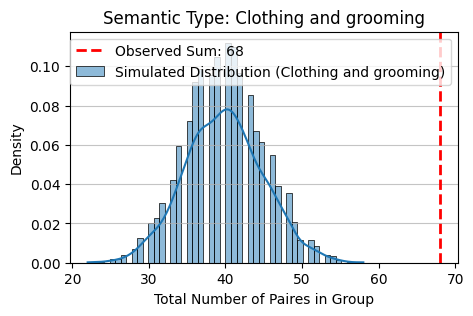

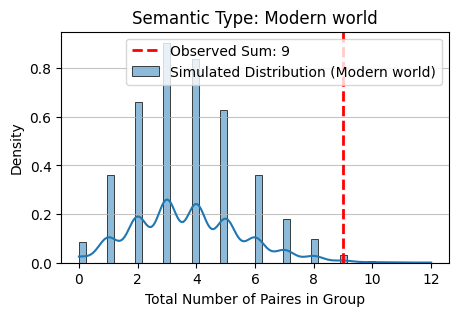

In [213]:
def plot_grouped_distribution(grouped_simulated_counts, grouped_observed_counts, num_bins=50):
    for sem_type in grouped_simulated_counts:
        simulated = np.array(grouped_simulated_counts[sem_type])
        observed = grouped_observed_counts[sem_type]

        plt.figure(figsize=(5, 3))
        sns.histplot(simulated, bins=num_bins, kde=True, stat="density", label=f"Simulated Distribution ({sem_type})")
        plt.axvline(observed, color='red', linestyle='dashed', linewidth=2, label=f'Observed Sum: {observed}')
        plt.title(f"Semantic Type: {sem_type}")
        plt.xlabel("Total Number of Paires in Group")
        plt.ylabel("Density")
        plt.legend()
        plt.grid(axis='y', alpha=0.75)
        plt.show()

plot_grouped_distribution(simulated_counts_grouped_Uralic, count_of_pair_grouped_Uralic)

# **4. Findings**

According to the Hypothesis Test, the Indo-european language family has signifiant more colexicfication pairs than the global average in the semantic types of 'The physical world', 'Warfare and hunting', 'Agriculture and vegetation', 'Basic actions and technology' and 'The house'.

On the other hand, the Uralic language family has signifiant more colexicfication pairs than the global average in all semantic types.